In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

In [2]:
#Load Dataset
data = pd.read_csv("adult 3.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#Replace '?' with 'Others' and clean data
data.replace('?', 'Others', inplace=True)
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data.drop(columns=['education'], inplace=True)


In [5]:
#Label Encode categorical features
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

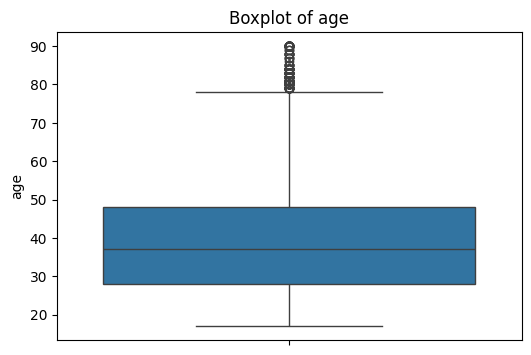

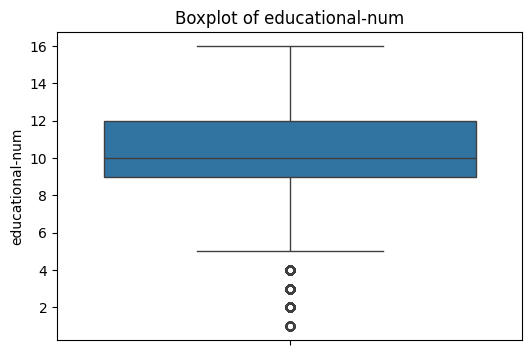

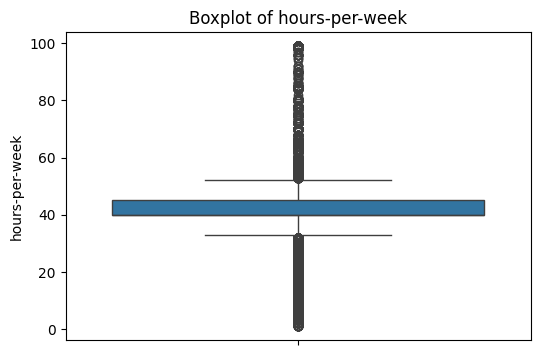

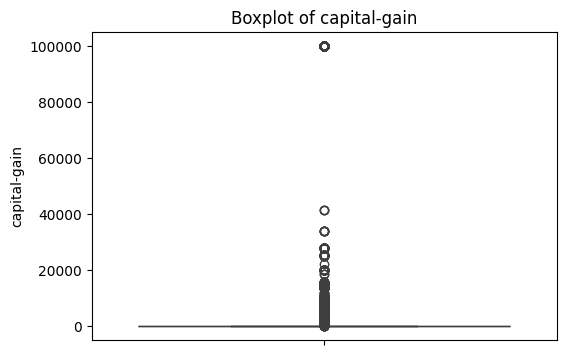

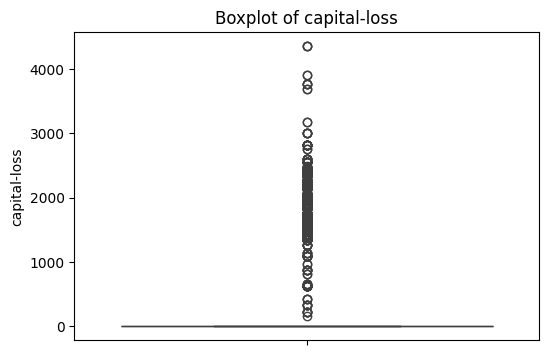

In [6]:
#Outlier Detection with Boxplots
numeric_cols = ['age', 'educational-num', 'hours-per-week', 'capital-gain', 'capital-loss']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

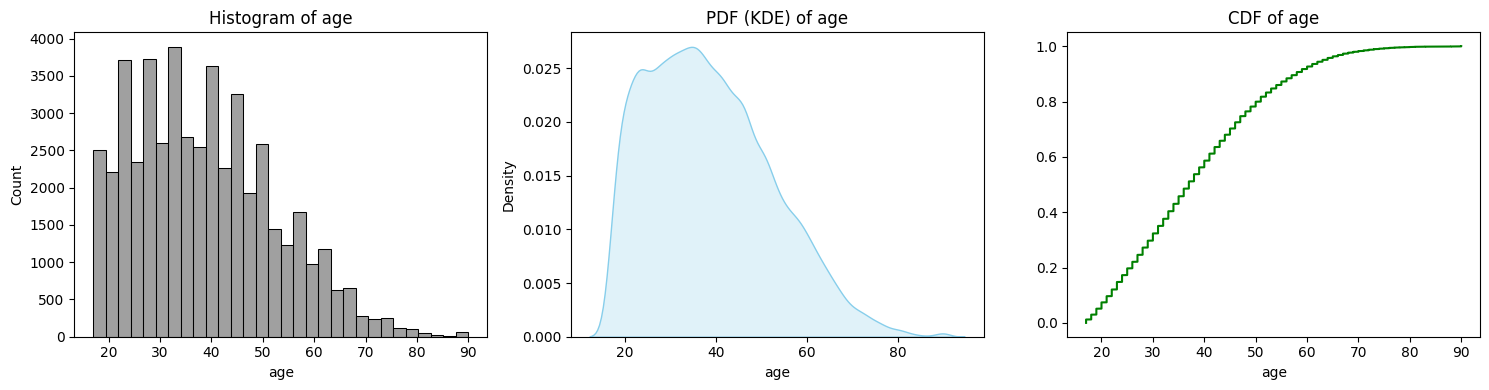

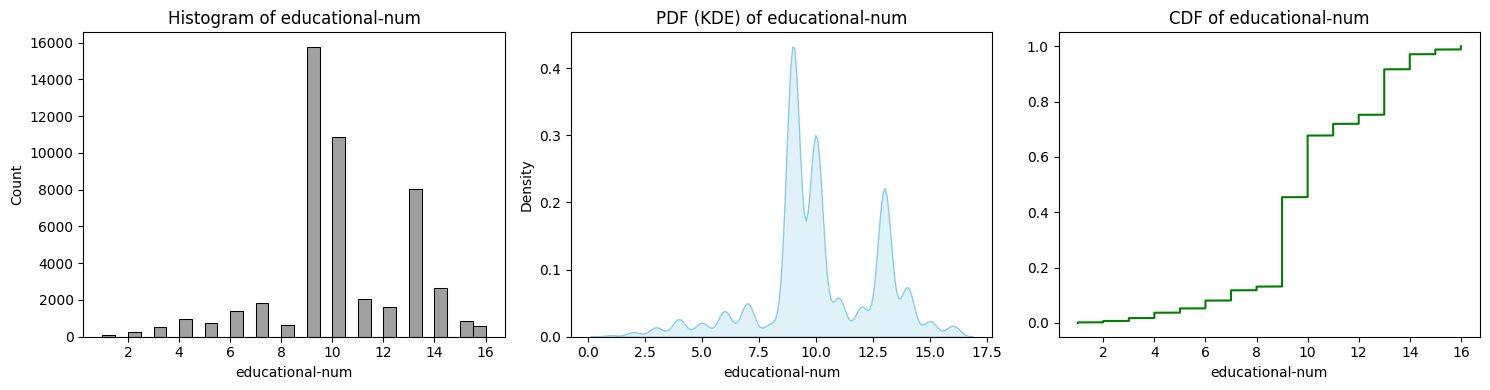

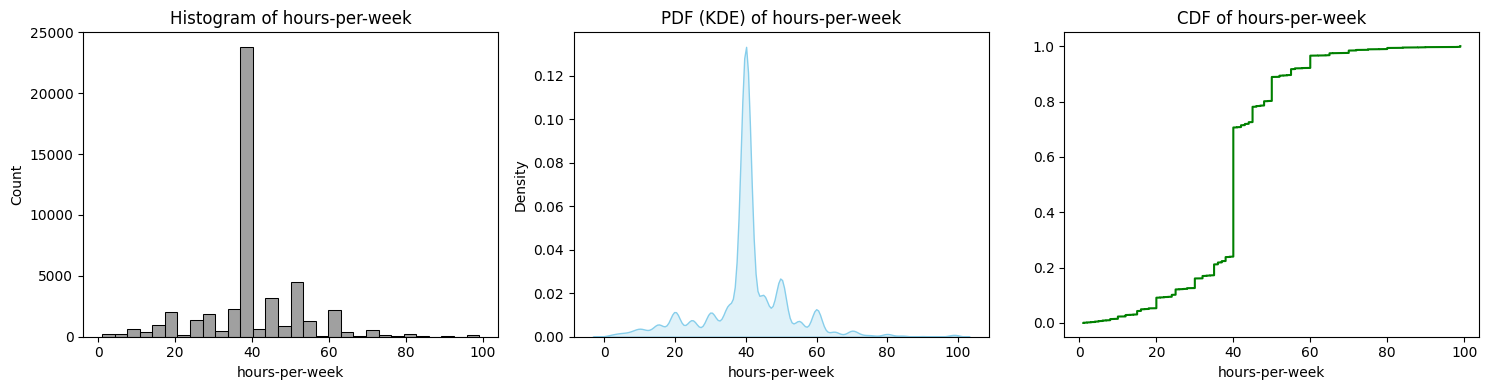

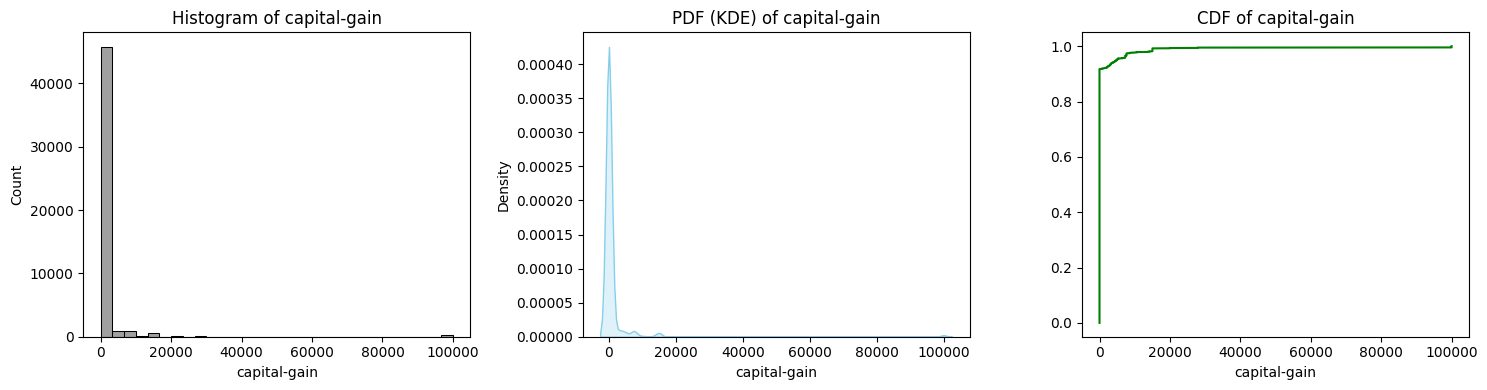

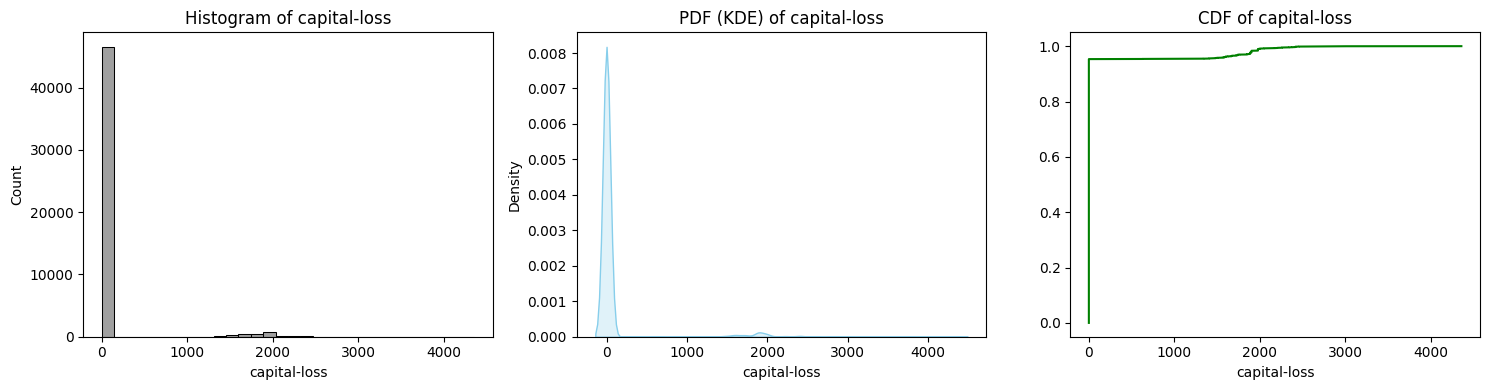

In [7]:
#PDF, CDF, and Histogram
for col in numeric_cols:
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[col], bins=30, kde=False, color='gray')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)

    # PDF
    plt.subplot(1, 3, 2)
    sns.kdeplot(data[col], fill=True, color='skyblue')
    plt.title(f'PDF (KDE) of {col}')
    plt.xlabel(col)

    # CDF
    plt.subplot(1, 3, 3)
    sorted_vals = np.sort(data[col])
    cdf = np.arange(len(sorted_vals)) / float(len(sorted_vals))
    plt.plot(sorted_vals, cdf, color='green')
    plt.title(f'CDF of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [8]:
#Remove outliers based on thresholds
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]
data = data[(data['hours-per-week'] >= 8) & (data['hours-per-week'] <= 80)]
data = data[(data['capital-gain'] <= 50000)]
data = data[(data['capital-loss'] <= 4000)]

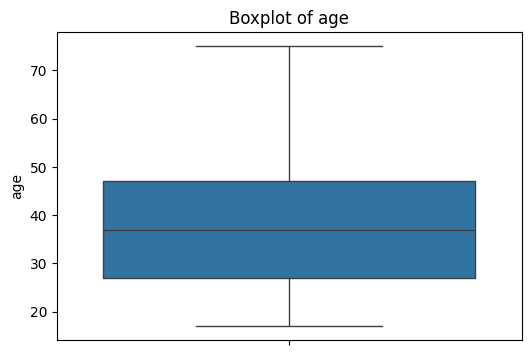

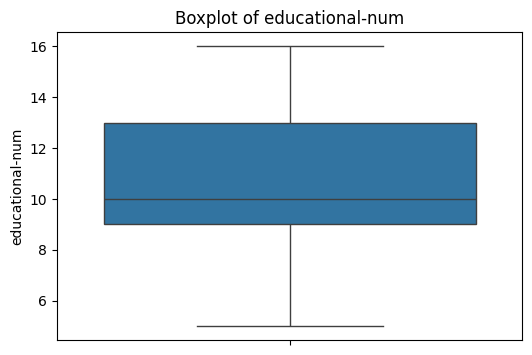

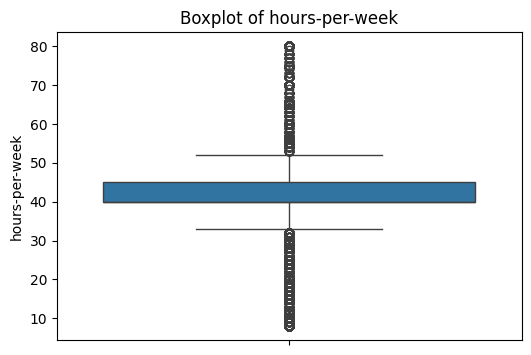

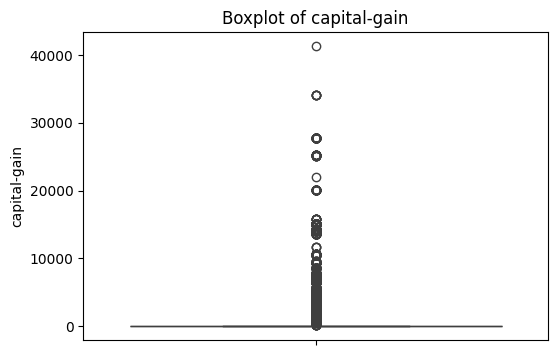

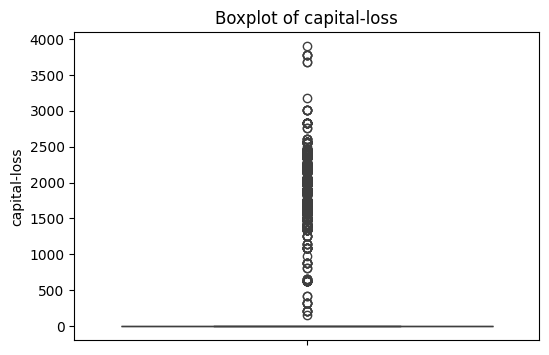

In [9]:
#Boxplots after removing outliers
numeric_cols = ['age', 'educational-num', 'hours-per-week', 'capital-gain', 'capital-loss']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [10]:
#Split features and target
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Naive Bayes Accuracy: 0.8056
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6955
           1       0.65      0.41      0.51      2205

    accuracy                           0.81      9160
   macro avg       0.74      0.67      0.69      9160
weighted avg       0.79      0.81      0.79      9160



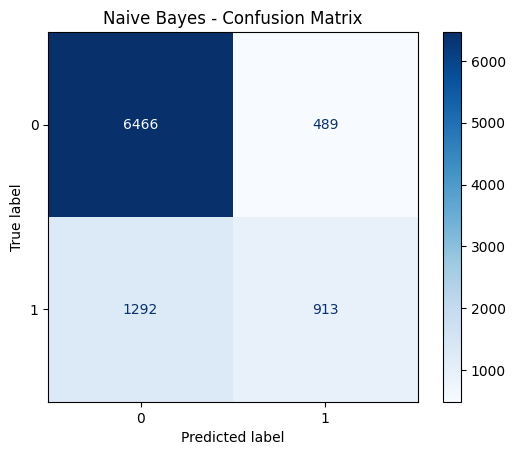


Decision Tree Accuracy: 0.8049
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6955
           1       0.59      0.61      0.60      2205

    accuracy                           0.80      9160
   macro avg       0.73      0.74      0.74      9160
weighted avg       0.81      0.80      0.81      9160



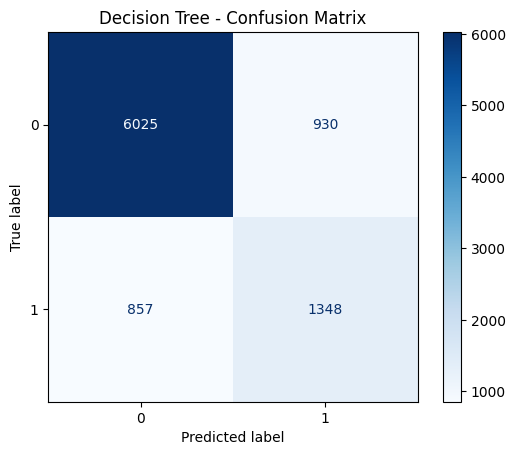


MLP Classifier Accuracy: 0.8451
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6955
           1       0.72      0.58      0.64      2205

    accuracy                           0.85      9160
   macro avg       0.80      0.75      0.77      9160
weighted avg       0.84      0.85      0.84      9160



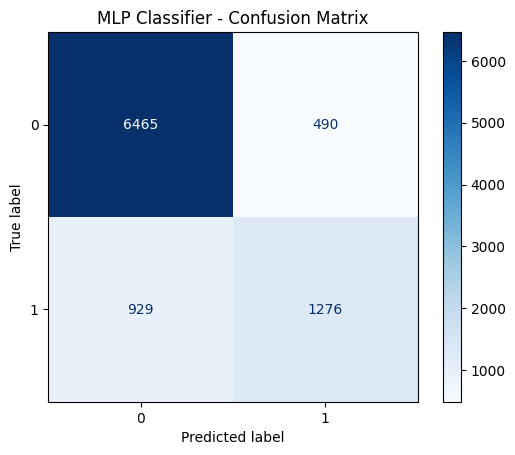

In [12]:
#Model Training and Evaluation
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

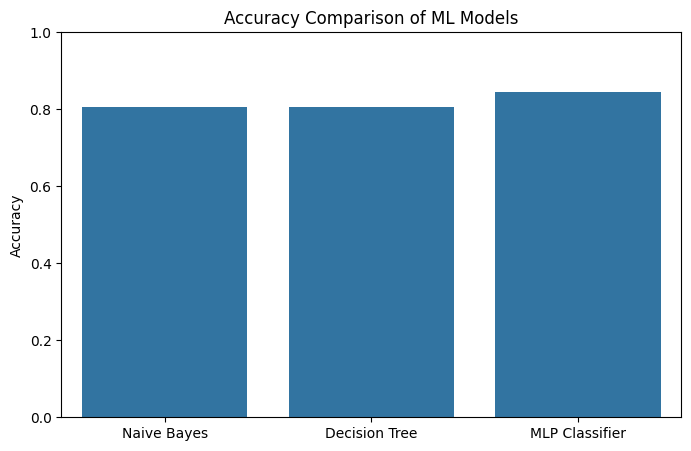

In [13]:
#Accuracy Comparison Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Accuracy Comparison of ML Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()